                                       Analisando o engajamento no Instagram

    O que queremos responder?

        Qual tipo de conteúdo mais engaja no Instagram da minha empresa?

        Temos a base de dados do Instagram desde que o usuário começou a postar na marca até o dia 27/março

        Ele também dá alguns direcionamentos: 
            Podem ignorar a coluna visualizações, queremos entender apenas curtidas, comentários e interações. 
            Tags vazias é que realmente não possuem tag (favor tratar como vazio).

    Vamos importar e visualizar a nossa base

In [ ]:
# importando o pandas

import pandas as pd

In [93]:
# importar a base em excel
# Base: 001. Analisando o engajamento no Instagram.xlsx

base = pd.read_excel('001.Analisando o engajamento no Instagram.xlsx')

In [94]:
# Visualizar as 5 primeiras linhas

base.head()

,Tipo,Data,Curtidas,Comentários,Visualizações,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,NaN,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,NaN,Loja/Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,NaN,Loja,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,"82,878.00",Produtos,N,N,NaN,5164
4,Foto,2021-09-13,4392,45,NaN,Produtos,S,N,NaN,4437


    Como ele pediu para não considerar a coluna visualizações, vamos retirar essa coluna da base
    O .drop() permite apagar uma coluna ou linha da base: base.drop(nome_coluna,axis=1)

    O axis = 1 se refere a coluna, enquanto axis = 0 se refere a linha

    Devemos passar o nome da coluna que queremos apagar da base

    Em caso de mais de 1 coluna, passamos a lista entre colchetes

In [95]:
# Apagando a coluna "Visualizações"

base = base.drop('Visualizações',axis=1)

In [96]:
# Visualizando novamente as 5 primeiras linhas

base.head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,NaN,5164
4,Foto,2021-09-13,4392,45,Produtos,S,N,NaN,4437


In [97]:
# Visualizando as 5 últimas linhas

base.tail()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
47,IGTV,2022-03-12,5489,77,Dicas de como usar/Novos Produtos,S,N,NaN,5566
48,Foto,2022-03-20,29084,479,Datas comemorativas/Promoções,S,S,NaN,29563
49,Foto,2022-03-22,9087,106,NaN,S,S,NaN,9193
50,Foto,2022-03-26,16551,186,NaN,S,N,NaN,16737
51,IGTV,2022-03-27,4934,65,Dicas de como usar/Produtos,S,N,NaN,4999


In [98]:
#Tamanho da base

base.shape

(52, 9)

In [99]:
# Verificando as informações

base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Tipo         52 non-null     object        
 1   Data         52 non-null     datetime64[ns]
 2   Curtidas     52 non-null     int64         
 3   Comentários  52 non-null     int64         
 4   Tags         44 non-null     object        
 5   Pessoas      52 non-null     object        
 6   Campanhas    52 non-null     object        
 7   Carrossel    8 non-null      object        
 8   Interacoes   52 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 3.8+ KB


    Carrossel possui apenas 8 valores não nulos
    Vamos entender os valores de carrossel



In [100]:
# Contando os valores que aparecem na coluna Carrossel

base.Carrossel.value_counts()

Carrossel
S    8
Name: count, dtype: int64

    Na verdade, os valores nulos são de postagens que não são carrossel. Sendo assim o nulo deveria ser “N”

    Tratando os valores nulos

In [101]:
# Filtrando os valores em que carrossel é nulo

base.loc[base.Carrossel.isnull()].head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,NaN,5164
4,Foto,2021-09-13,4392,45,Produtos,S,N,NaN,4437


In [102]:
# Buscando valores que NÃO são nulos

base.loc[base.Carrossel.notnull()].head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
5,Foto,2021-09-17,5359,62,Novos Produtos,N,S,S,5421
8,Foto,2021-09-27,6355,89,Produtos,S,N,S,6444
12,Foto,2021-10-21,6166,55,Novos Produtos,S,S,S,6221
21,Foto,2021-12-23,8328,93,Produtos,S,N,S,8421
25,Foto,2022-01-02,12193,138,Novos Produtos,S,N,S,12331


In [103]:
# Selecionando apenas a coluna Carrossel

base.loc[base.Carrossel.isnull(),'Carrossel'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Carrossel, dtype: object

In [104]:
# Agora vamos atribuir o valor N para essa coluna

base.loc[base.Carrossel.isnull(),'Carrossel'] = 'N'

In [105]:
base.head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,N,2874
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,N,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,N,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,N,5164
4,Foto,2021-09-13,4392,45,Produtos,S,N,N,4437


In [106]:
# Filtrando os valores em que carrossel é nulo

base.loc[base.Carrossel.isnull()].head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes


In [107]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Tipo         52 non-null     object        
 1   Data         52 non-null     datetime64[ns]
 2   Curtidas     52 non-null     int64         
 3   Comentários  52 non-null     int64         
 4   Tags         44 non-null     object        
 5   Pessoas      52 non-null     object        
 6   Campanhas    52 non-null     object        
 7   Carrossel    52 non-null     object        
 8   Interacoes   52 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 3.8+ KB


In [108]:
# Verificando novamente os valores dessa coluna

base.Carrossel.value_counts()

Carrossel
N    44
S     8
Name: count, dtype: int64

    Mostrando as informações estatísticas

In [109]:
# Descrição estatística da base

base.describe()

,Data,Curtidas,Comentários,Interacoes
count,52,52.00,52.00,52.00
mean,2021-12-23 04:36:55.384615424,"12,262.73",189.50,"12,452.23"
min,2021-09-11 00:00:00,"2,807.00",9.00,"2,816.00"
25%,2021-10-23 06:00:00,"5,492.00",69.50,"5,562.50"
50%,2022-01-05 00:00:00,"9,603.00",128.00,"9,773.50"
75%,2022-02-15 12:00:00,"17,621.75",265.25,"17,920.75"
max,2022-03-27 00:00:00,"37,351.00",852.00,"37,853.00"
std,NaN,"8,165.88",170.69,"8,299.39"


    Visualizando essas informações de maneira gráfica

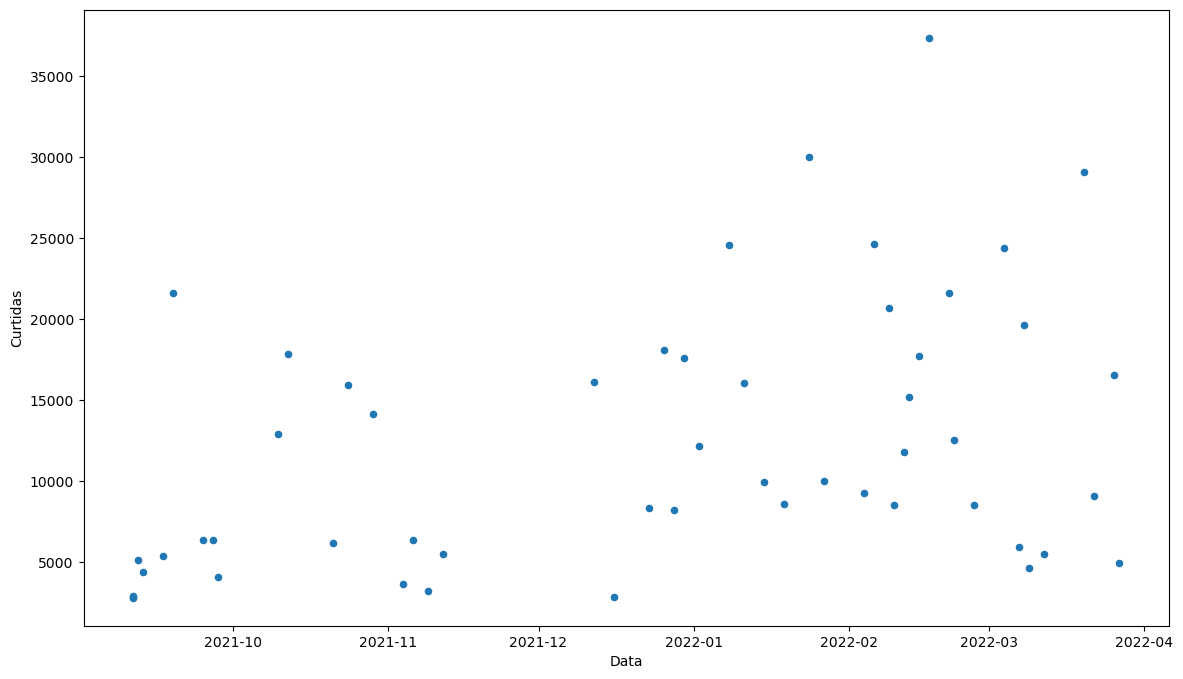

In [110]:
# Um gráfico de dispersão ajudaria a entender melhor curtidas e comentários

base.plot(kind='scatter', x='Data', y='Curtidas', figsize=(14,8));

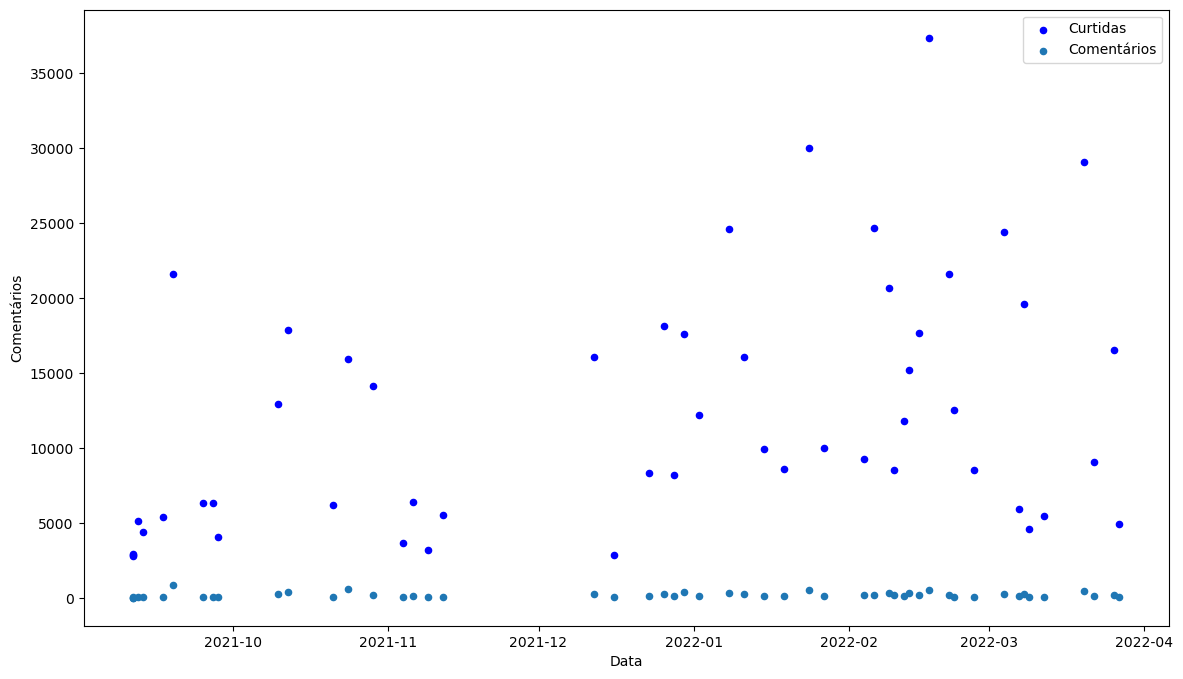

In [111]:
# Podemos colocar curtidas e comentários no mesmo gráfico

ax = base.plot(kind='scatter', x='Data', y='Curtidas', color='blue', label='Curtidas', figsize=(14,8));
base.plot(kind='scatter', x='Data', y='Comentários', label='Comentários',figsize=(14,8),ax=ax);

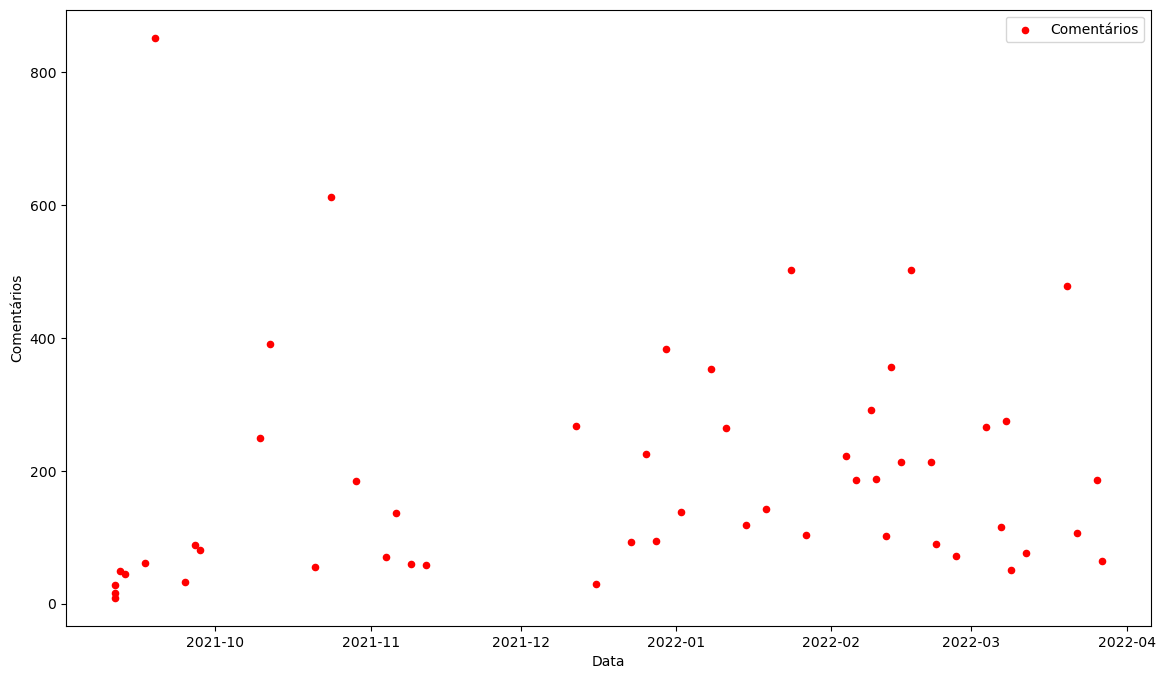

In [112]:
# A escala de curtidas pode  estar atrapalhando a visualização, por isso vamos deixar comentários em gráfico separado

base.plot(kind='scatter', x='Data', y='Comentários', color='red',label='Comentários',figsize=(14,8));

    O gráfico e as informações estatísticas não estão dizendo muita coisa pois existe uma grande dispersão entre curtidas e comentários

    Precisamos verificar se existe um padrão usando as outras colunas de informações

    A primeira coisa que podemos fazer é pegar os 5 primeiros registros com mais e menos curtidas.

In [113]:
# Ordenando os valores

base.sort_values(by='Curtidas', ascending=False).head()


,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
39,Foto,2022-02-17,37351,502,Promoções,S,S,N,37853
30,Reels,2022-01-24,29981,502,Trends,S,S,N,30483
48,Foto,2022-03-20,29084,479,Datas comemorativas/Promoções,S,S,N,29563
33,Foto,2022-02-06,24655,186,Influenciadores,S,S,N,24841
26,Foto,2022-01-08,24585,354,Datas comemorativas,S,S,S,24939


In [114]:
# Selecionando os 5 últimos valores

base.sort_values(by='Curtidas', ascending=False).tail()


,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
17,Vídeo,2021-11-09,3213,60,Produtos,N,N,N,3273
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,N,2958
20,Foto,2021-12-16,2881,29,Produtos,N,N,N,2910
0,Foto,2021-09-11,2858,16,Loja,N,N,N,2874
2,Foto,2021-09-11,2807,9,Loja,N,N,N,2816


    Podemos observar que no top 5 todas as postagens tinham pessoas e eram fotos de campanha

    Nas 5 piores postagens, não haviam pessoas e nem eram postagens de campanhas

    Isso pode ser um indicador que pessoas e campanhas tem relação com as curtidas

In [115]:
#Para melhorar a visualização, vamos criar um padrão no formato dos valores

pd.options.display.float_format = '{:,.2f}'.format

In [116]:
#Agrupando as informações por tipo

base.groupby('Tipo')['Curtidas'].mean()

Tipo
Foto    13,341.14
IGTV     6,833.40
Reels   14,873.00
Vídeo    8,141.50
Name: Curtidas, dtype: float64

In [117]:
# Agrupando por Tipo e Pessoas

base.groupby(['Tipo', 'Pessoas'])[['Curtidas']].mean()

Curtidas
Tipo  Pessoas          
Foto  N        3,863.50
      S       15,236.67
IGTV  S        6,833.40
Reels N        5,934.50
      S       20,832.00
Vídeo N        4,007.50
      S       16,409.50

In [118]:
base.groupby(['Tipo', 'Pessoas'])[['Curtidas', 'Comentários']].mean()

Curtidas  Comentários
Tipo  Pessoas                       
Foto  N        3,863.50        29.50
      S       15,236.67       226.20
IGTV  S        6,833.40       133.60
Reels N        5,934.50        98.00
      S       20,832.00       342.00
Vídeo N        4,007.50        65.25
      S       16,409.50       370.00

In [119]:
# Incluindo a coluna de campanhas

base.groupby(['Tipo', 'Pessoas', 'Campanhas'])[['Curtidas', 'Comentários']].mean()

Curtidas  Comentários
Tipo  Pessoas Campanhas                       
Foto  N       N          2,869.00        20.50
              S          5,852.50        47.50
      S       N         10,815.29       159.93
              S         19,105.38       284.19
IGTV  S       N          6,833.40       133.60
Reels N       N          5,934.50        98.00
      S       N         12,894.00       249.00
              S         24,801.00       388.50
Vídeo N       N          4,007.50        65.25
      S       S         16,409.50       370.00

    O groupby já permite ver que publicações de campanha tem um grande engajamento e com foto de pessoas também

    Podemos então fazer os agrupamentos que acharmos melhor para entender os nossos dados

In [120]:
# Somente para pessoas

base.groupby('Pessoas')[['Curtidas', 'Comentários']].mean()

,Curtidas,Comentários
Pessoas,,
N,"4,256.67",52.83
S,"14,664.55",230.50


In [121]:
# Somente para campanhas

base.groupby('Campanhas')[['Curtidas', 'Comentários']].mean()

,Curtidas,Comentários
Campanhas,,
N,"7,928.33",123.17
S,"18,173.27",279.95


In [122]:
# Carrossel sem filtrar a base = Esta errado essa comparação

base.groupby('Carrossel')[['Curtidas', 'Comentários']].mean()

,Curtidas,Comentários
Carrossel,,
N,"12,343.61",198.43
S,"11,817.88",140.38


In [123]:
# Podemos também filtrar a base

base[base.Tipo == 'Foto'].groupby('Carrossel')[['Curtidas', 'Comentários']].mean()

,Curtidas,Comentários
Carrossel,,
N,"13,776.36",208.57
S,"11,817.88",140.38


    A média sem usar carrossel é melhor do que quando usamos, então não é algo que possa impactar tanto no resultado das mídias dessa empresa olhando inicialmente

    Nesse caso devemos filtrar apenas as fotos pois só temos carrossel em fotos. Sem esse filtro estaríamos comparando coisas erradas

    Colocando pessoas e campanhas junto podemos ver como se dá essa diferença

In [124]:
# Agregando por pessoas e campanhas

base.groupby(['Pessoas','Campanhas'])[['Curtidas', 'Comentários']].mean()

Curtidas  Comentários
Pessoas Campanhas                       
N       N          3,937.50        53.90
        S          5,852.50        47.50
S       N          9,923.75       157.80
        S         19,405.35       303.20

    A média quando tem pessoas e publicação de campanhas é de cerca de 19,4 mil curtidas, já quando é apenas pessoas (sem campanha passa para quase 10mil e se não tiver pessoas chega no máximo a 5,9 mil mesmo em campanhas

    Nesse caso a gente já consegue mostrar para a empresa a importância de incluir pessoas usando os seus produtos, o que gera um aumento considerável no engajamento

In [125]:
# Agregando por pessoas, campanhas e tipo

base.groupby(['Pessoas', 'Campanhas','Tipo'])[['Curtidas', 'Comentários']].mean()

Curtidas  Comentários
Pessoas Campanhas Tipo                        
N       N         Foto   2,869.00        20.50
                  Reels  5,934.50        98.00
                  Vídeo  4,007.50        65.25
        S         Foto   5,852.50        47.50
S       N         Foto  10,815.29       159.93
                  IGTV   6,833.40       133.60
                  Reels 12,894.00       249.00
        S         Foto  19,105.38       284.19
                  Reels 24,801.00       388.50
                  Vídeo 16,409.50       370.00

    Analisando novamente a questão do vídeo, ele não parece mais tão ruim assim. Quando feito em campanha e usando pessoas ele teve um resultado bom, inclusive próximo a foto

    O que poderia ter levado a média baixa é que só temos vídeos ou COM pessoa e COM campanha ou sem nenhum dos dois. Não temos nenhum vídeo com apenas um dos dois (pessoas ou campanha)

    Já IGTV, mesmo tendo pessoa, não teve um resultado tão bom

    Inclusive podemos entender o que havia gerado a média baixo no vídeo

In [126]:
# Vamos filtrar a base apenas onde o tipo é video

base[base.Tipo == 'Vídeo']

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,N,5164
9,Vídeo,2021-09-28,4056,81,Produtos,N,N,N,4137
15,Vídeo,2021-11-04,3646,71,Produtos,N,N,N,3717
17,Vídeo,2021-11-09,3213,60,Produtos,N,N,N,3273
24,Vídeo,2021-12-30,17600,383,Trends,S,S,N,17983
37,Vídeo,2022-02-13,15219,357,Datas comemorativas,S,S,N,15576


                                                 Conclusões
                    
    Em uma análise inicial, postagens incluindo pessoas engajam muito mais que aquelas que aquelas que não possui ninguém

    Postagens em épocas de campanha também possuem um melhor engajamento

    Nessa base, o carrossel não foi um diferencial para melhorar o engajamento da marca

                               O que queremos responder?
 
    Qual a tag mais engaja nessas publicações? Agora queremos olhar apenas tags

    Ele também dá alguns direcionamentos: 

    Podem ignorar a coluna visualizações, queremos entender apenas curtidas, comentários e interações Tags vazias é que realmente não possuem tag (favor tratar como vazio)

In [128]:
# Importando o pandas

import pandas as pd
import numpy as np

# Usando o mesmo formato dos valores
pd.options.display.float_format = '{:,.2f}'.format

In [129]:
# Importar a base em excel
base = pd.read_excel('001.Analisando o engajamento no Instagram.xlsx')

In [130]:
# Apagando a coluna 'Visualizações'

base = base.drop('Visualizações', axis=1)

In [131]:
# Visualizando novamente as 5 primeiras linhas
base.head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,NaN,5164
4,Foto,2021-09-13,4392,45,Produtos,S,N,NaN,4437


In [132]:
# Agrupamento por tags
base.groupby('Tags')['Curtidas'].mean()

Tags
Datas comemorativas                 17,975.00
Datas comemorativas/Promoções       29,084.00
Dicas de como usar/Novos Produtos    5,703.50
Dicas de como usar/Produtos          7,586.67
Influenciadores                     15,197.29
Loja                                 2,832.50
Loja/Produtos                        2,930.00
Novos Produtos                      11,619.57
Produtos                             5,666.92
Promoções                           26,645.50
Trends                              22,400.67
Trends/Produtos                     12,894.00
Name: Curtidas, dtype: float64

    Para conseguir analisar separadamente as tags, podemos dividir linhas com 2 tags em 2 linhas
    Para isso primeiro vamos usar o split para separar em uma lista com as tags

    Depois vamos usar o explode para transformar as listas com 2 tags em 2 linhas diferentes

    O split separa um texto em uma lista baseado em algum separador

In [133]:
# Vamos usar isso para a nossa coluna 'Tags'
# Trasnformando a coluna Tags em uma linha de tags
base.Tags = base.Tags.str.split('/')
base.head()


,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,[Loja],N,N,NaN,2874
1,Foto,2021-09-11,2930,28,"[Loja, Produtos]",N,N,NaN,2958
2,Foto,2021-09-11,2807,9,[Loja],N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,[Produtos],N,N,NaN,5164
4,Foto,2021-09-13,4392,45,[Produtos],S,N,NaN,4437


        O explode vai separar uma coluna de um DataFrame em 1 linha para cada elemento da lista

    ·         Tudo que estiver em lista será separado em 1 linha por elemento da lista

    ·         Se não tiver na lista, o elemento será mantido

    ·         Listas vazias vão ter o valor de NaN

 

    ·         Para as outras colunas, elas irão repetir os seus valores

    ·         Inclusive o índice também irá repetir

In [134]:
# Separando a coluna Tag em 1 linha para cada elemento da linha
base = base.explode('Tags')
base.head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,NaN,2874
1,Foto,2021-09-11,2930,28,Loja,N,N,NaN,2958
1,Foto,2021-09-11,2930,28,Produtos,N,N,NaN,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,NaN,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,NaN,5164


    Fazendo a mesma análise da média por tag

    Aviso importante: muito cuidado pois as outras colunas serão duplicadas, então não podemos fazer o mesmo cálculo da média que estávamos fazendo

In [135]:
# Analisando a média de Tag
base.groupby('Tags')['Curtidas'].mean()

Tags
Datas comemorativas   20,752.25
Dicas de como usar     6,833.40
Influenciadores       15,197.29
Loja                   2,865.00
Novos Produtos        10,304.89
Produtos               6,269.82
Promoções             27,458.33
Trends                20,024.00
Name: Curtidas, dtype: float64

In [136]:
# Ordenando por curtidas
base.groupby('Tags')[['Curtidas', 'Comentários']].mean().sort_values('Curtidas',ascending=False)

,Curtidas,Comentários
Tags,,
Promoções,"27,458.33",531.00
Datas comemorativas,"20,752.25",343.50
Trends,"20,024.00",352.25
Influenciadores,"15,197.29",161.71
Novos Produtos,"10,304.89",198.56
Dicas de como usar,"6,833.40",133.60
Produtos,"6,269.82",94.12
Loja,"2,865.00",17.67


       Postagens de promoções são as que mais engajam

    ·     Além de promoções, datas comemorativas e trends também possuem um bom engajamento

In [137]:
# Filtrando valores sem tag
base[base.Tags.isnull()]

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
11,Foto,2021-10-12,17831,391,NaN,S,S,NaN,18222
19,Foto,2021-12-12,16086,268,NaN,S,S,NaN,16354
29,Foto,2022-01-19,8612,142,NaN,S,N,NaN,8754
38,Foto,2022-02-15,17687,213,NaN,S,N,NaN,17900
41,Foto,2022-02-22,12530,90,NaN,S,N,NaN,12620
43,Foto,2022-03-04,24399,266,NaN,S,S,NaN,24665
49,Foto,2022-03-22,9087,106,NaN,S,S,NaN,9193
50,Foto,2022-03-26,16551,186,NaN,S,N,NaN,16737


In [138]:
base.loc[base.Tags.isnull(),'Tags']

11    NaN
19    NaN
29    NaN
38    NaN
41    NaN
43    NaN
49    NaN
50    NaN
Name: Tags, dtype: object

    Da mesma forma que fizemos para Carrossel, poderíamos ter feito para as tags escrevendo “Sem tag” e nesse caso iria aparecer no groupby.

In [139]:
# Atribuindo o texto sem tag para as colunas onde a tag é NaN
base.loc[base.Tags.isnull(),'Tags'] = 'Sem tag'

In [140]:
# Mostrando novamente a tabela de curtidas por tag
base.groupby('Tags')[['Curtidas', 'Comentários']].mean().sort_values('Curtidas',ascending=False)

,Curtidas,Comentários
Tags,,
Promoções,"27,458.33",531.00
Datas comemorativas,"20,752.25",343.50
Trends,"20,024.00",352.25
Sem tag,"15,347.88",207.75
Influenciadores,"15,197.29",161.71
Novos Produtos,"10,304.89",198.56
Dicas de como usar,"6,833.40",133.60
Produtos,"6,269.82",94.12
Loja,"2,865.00",17.67


In [141]:
# Podemos voltar como NaN caso a gente queira somente ignorar esses valores conforme orientado
import numpy as np
base.loc[base.Tags == 'Sem tag', "Tags"] = np.nan

In [142]:
# E voltamos com as colunas com valores nulos
base[base.Tags.isnull()]

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
11,Foto,2021-10-12,17831,391,NaN,S,S,NaN,18222
19,Foto,2021-12-12,16086,268,NaN,S,S,NaN,16354
29,Foto,2022-01-19,8612,142,NaN,S,N,NaN,8754
38,Foto,2022-02-15,17687,213,NaN,S,N,NaN,17900
41,Foto,2022-02-22,12530,90,NaN,S,N,NaN,12620
43,Foto,2022-03-04,24399,266,NaN,S,S,NaN,24665
49,Foto,2022-03-22,9087,106,NaN,S,S,NaN,9193
50,Foto,2022-03-26,16551,186,NaN,S,N,NaN,16737


In [143]:
# E essas linhas novamente param de ser considerados na agregação
base.groupby('Tags')[['Curtidas', 'Comentários']].mean().sort_values('Curtidas',ascending=False)

,Curtidas,Comentários
Tags,,
Promoções,"27,458.33",531.00
Datas comemorativas,"20,752.25",343.50
Trends,"20,024.00",352.25
Influenciadores,"15,197.29",161.71
Novos Produtos,"10,304.89",198.56
Dicas de como usar,"6,833.40",133.60
Produtos,"6,269.82",94.12
Loja,"2,865.00",17.67


    Agora analisando as tags com pessoas e campanhas

In [144]:
# Fazendo para Pessoas e Tag
base.groupby(['Pessoas', 'Tags'])[['Curtidas', 'Comentários']].mean()

Curtidas  Comentários
Pessoas Tags                                      
N       Loja                 2,865.00        17.67
        Novos Produtos       5,359.00        62.00
        Produtos             4,450.67        60.78
S       Datas comemorativas 20,752.25       343.50
        Dicas de como usar   6,833.40       133.60
        Influenciadores     15,197.29       161.71
        Novos Produtos      10,923.12       215.62
        Produtos             8,316.38       131.62
        Promoções           27,458.33       531.00
        Trends              20,024.00       352.25

In [145]:
# Também podemos ordenar por curtidas
base.groupby(['Pessoas', 'Tags'])[['Curtidas', 'Comentários']].mean().sort_values('Curtidas',ascending=False)

Curtidas  Comentários
Pessoas Tags                                      
S       Promoções           27,458.33       531.00
        Datas comemorativas 20,752.25       343.50
        Trends              20,024.00       352.25
        Influenciadores     15,197.29       161.71
        Novos Produtos      10,923.12       215.62
        Produtos             8,316.38       131.62
        Dicas de como usar   6,833.40       133.60
N       Novos Produtos       5,359.00        62.00
        Produtos             4,450.67        60.78
        Loja                 2,865.00        17.67

In [146]:
# Fazendo para Campanhas e Tag
base.groupby(['Campanhas', 'Tags'])[['Curtidas', 'Comentários']].mean().sort_values('Curtidas',ascending=False)

Curtidas  Comentários
Campanhas Tags                                      
S         Promoções           33,217.50       490.50
          Trends              22,400.67       386.67
          Datas comemorativas 20,752.25       343.50
          Influenciadores     18,715.40       197.60
N         Promoções           15,940.00       612.00
          Trends              12,894.00       249.00
S         Novos Produtos      11,040.67       323.00
N         Novos Produtos       9,937.00       136.33
S         Produtos             9,074.00        67.50
N         Dicas de como usar   6,833.40       133.60
          Influenciadores      6,402.00        72.00
          Produtos             5,895.93        97.67
          Loja                 2,865.00        17.67

## Conclusões

### Ter o rosto de outras pessoas é fundamental para um bom engajamento na publicação em todas as tags, quando havia o rosto, o resultado foi muito melhor

Criar campanhas ajuda muito na divulgação da marca

Promoções tiveram um desempenho absurdamente maior que qualquer outra tag porém é uma tag que pode ter custo para a loja, o que deve ser analisado

Usar conteúdo que estão em trend também ajudam na divulgação da marca, mesmo a trend sendo de outros nichos

A melhor maneira de mostrar produtos é através de outras pessoas utilizando-os, e se possível em campanhas de datas especiais.

Para novos produtos a inclusão de pessoas é mais crítica ainda, sendo quase o dobro quando há  um rosto junto ao produto.

Não podemos afirmar que Tag Loja é ruim até testarmos essa tag incluindo pessoas ou em uma campanha. Vale o teste para verificar.

Continuaremos a monitorar as postagens para encontrar novos padrões dado que ainda temos poucas informações da base.